In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

red_df = pd.read_csv("winequality-red.csv", sep=';')
white_df = pd.read_csv("winequality-white.csv", sep=';')

In [31]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [33]:
red_df.shape

(1599, 12)

In [34]:
white_df.shape

(4898, 12)

* I am interested to find
    - What chemical characteristics are most important in predicting the quality of wine?
    - Is certain type of wine associated with higher quality?
    - Do wines with higher alcoholic content receive better ratings?
    - Do sweeter wines receive better ratings?
    - What level of acidity associated with better quality?

* First, determine null info.

In [35]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* Ok, so there are no missing values in data set. Let's explore duplicated records.

In [37]:
sum(red_df.duplicated())

240

In [38]:
sum(white_df.duplicated())

937

In [39]:
red_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [40]:
white_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [41]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [42]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* I want to combine these two data frames, but before that we need some attribute which distinguish red and white wines/

In [43]:
red_df['color'] = "red"

In [44]:
white_df['color'] = "white"

In [45]:
wine_df = red_df.append(white_df)

In [46]:
wine_df.shape

(6497, 13)

In [47]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


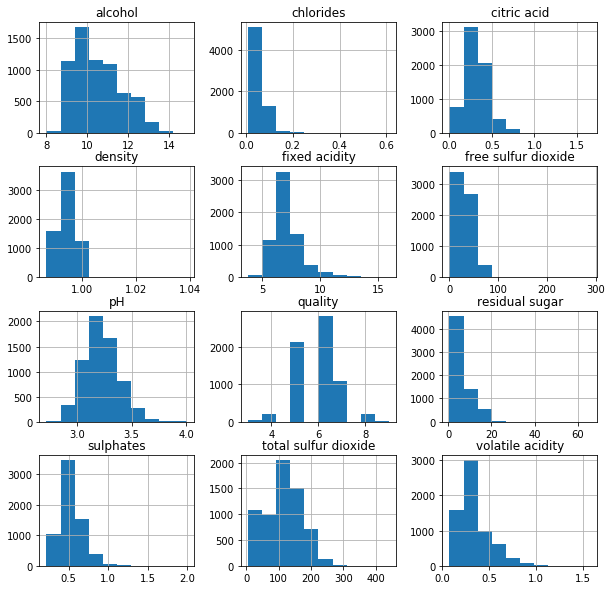

In [50]:
wine_df.hist(figsize=(10,10));

Text(0, 0.5, 'Quality')

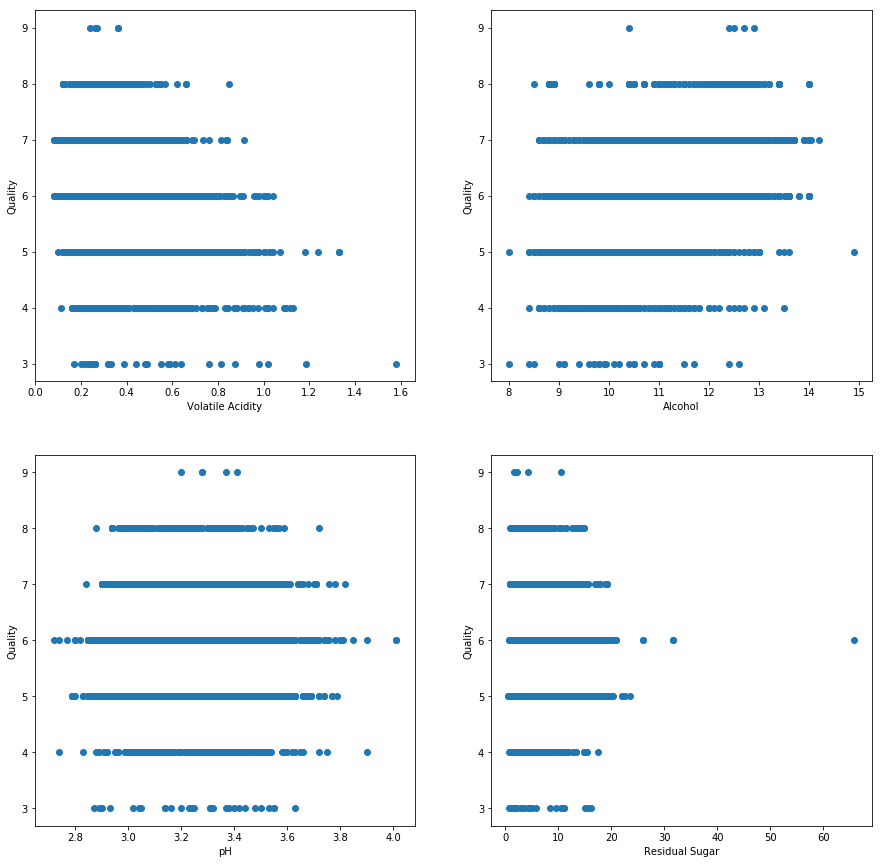

In [84]:
fig, ax = plt.subplots(2,2,figsize=(15,15))

ax[0,0].scatter(wine_df['volatile acidity'], wine_df.quality)
ax[0,0].set_xlabel("Volatile Acidity")
ax[0,0].set_ylabel("Quality")

ax[0,1].scatter(wine_df.alcohol, wine_df.quality)
ax[0,1].set_xlabel("Alcohol")
ax[0,1].set_ylabel("Quality")

ax[1,0].scatter(wine_df.pH, wine_df.quality)
ax[1,0].set_xlabel("pH")
ax[1,0].set_ylabel("Quality")

ax[1,1].scatter(wine_df['residual sugar'], wine_df.quality)
ax[1,1].set_xlabel("Residual Sugar")
ax[1,1].set_ylabel("Quality")

### Is certain kind of wine (red/white) associated with higher quality?

In [122]:
avg_by_color = wine_df.groupby('color')['quality'].mean()

In [123]:
avg_by_color

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

Text(0, 0.5, 'Quality')

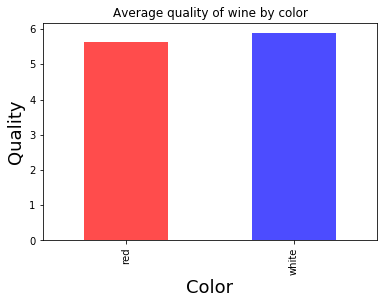

In [124]:
colors = ['red', 'blue']
avg_by_color.plot(kind='bar', title="Average quality of wine by color", color=colors, alpha=0.7)
plt.xlabel("Color", fontsize=18)
plt.ylabel("Quality", fontsize=18)

### What level of acidity (pH value) receives the highest average rating?

* First of all we will divide our data set bu acidity level so we can group by acidity categories.

In [88]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [91]:
wine_df['acidity_category'] = pd.cut(wine_df.pH, 4, labels=["high", "moderate_high", "medium", "low"])

In [92]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderate_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,moderate_high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderate_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


In [93]:
wine_df.groupby('acidity_category')['quality'].mean()

acidity_category
high             5.824683
moderate_high    5.815145
medium           5.826364
low              5.825000
Name: quality, dtype: float64

### Do wines with higher alcohol content receive better ratings?

In [94]:
wine_df['alcohol'].median()

10.3

In [96]:
low_alcohol = wine_df.query('alcohol <= 10.3')

In [98]:
high_alcohol = wine_df.query('alcohol > 10.3')

In [99]:
low_alcohol.quality.mean()

5.484673748103186

In [100]:
high_alcohol.quality.mean()

6.161773891317926

### Do sweeter wines receive better ratings?

In [101]:
wine_df['residual sugar'].median()

3.0

In [107]:
low_sugar = wine_df[wine_df['residual sugar']<=3.0]
high_sugar= wine_df[wine_df['residual sugar']>3.0]

In [108]:
low_sugar.quality.mean()

5.8075864178647905

In [109]:
high_sugar.quality.mean()

5.829306071871128